### **Title: Truth or Deception: Machine Learning for Story Veracity Detection**

# 1 Author

**Student Name**: Sowmya Shree Kalegowda

**Student ID**: 240719212


# 2 Problem formulation

The goal of this project is to solve a deception detection problem using machine learning or Deep Learning. Specifically, we want to determine whether a narrated story is true or false based on audio recordings. This problem is intriguing because it combines elements of natural language processing, audio analysis, and psychology. Understanding the subtle patterns that indicate deception, such as vocal tone, pitch, and speech patterns, is both challenging and fascinating. By leveraging machine learning or deep learning, we can explore how well algorithms can discern truth from lies in human storytelling, which has potential applications in areas like fraud detection, law enforcement, and psychology.

# 3 Methodology

**3.1 Training Task**

Training Set: The training set consisted of the majority of the data (80%), with the labels balanced using SMOTE to ensure both classes were equally represented. The LSTM-RNN model is trained on reshaped data to account for temporal dependencies in the audio features. Specifically, the data was reshaped to a 3D format (samples, time_steps, features) as required for training an LSTM.

**Model Trained:**
The following LSTM-RNN model was trained:

LSTM-RNN Architecture: The model consisted of two LSTM layers with 64 and 32 units, respectively, followed by a dense layer with 16 neurons and an output layer with a sigmoid activation function for binary classification.

Hyperparameters: The LSTM was trained for 50 epochs with a batch size of 16, using the Adam optimizer and binary cross-entropy loss.

**3.2 Validation Task**

Validation Set: The testing set (20%) was used for model validation. The dataset was split using stratification to maintain the same proportion of labels as in the original dataset.

Cross-Validation: Cross-validation was implicitly performed during training by splitting the training data into training and validation subsets (80-20 split) to monitor model performance.

**3.3 Evaluation Metrics:**

Accuracy: Used to evaluate the overall performance of the model in correctly predicting true and false labels.

Confusion Matrix: Used to understand the distribution of true positives, false positives, true negatives, and false negatives.

Precision, Recall, and F1-score: These metrics were used to assess the quality of the predictions, especially for evaluating how well the model distinguished between true and false narratives.

**3.4 Performance Metrics**

Accuracy: The model's accuracy was evaluated on the test set, and the final accuracy achieved by the LSTM-RNN was reported as 76%.

**LSTM Test Accuracy: 0.762499988079071**

Confusion Matrix: The confusion matrix was generated to visualize how well the model performed in terms of true vs. false predictions.

Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.65      0.73        40
           1       0.71      0.88      0.79        40

    accuracy                           0.76        80
    macro avg      0.78      0.76      0.76        80
    weighted avg   0.78      0.76      0.76        80

Classification Report: A detailed classification report, including precision, recall, and F1-score, was generated to provide insight into the model's performance for each class.


Training and Validation Performance: Training and validation loss and accuracy were plotted over epochs to understand the learning behavior of the model and detect any signs of overfitting or underfitting.



# 4 Implemented ML prediction pipelines

The prediction pipelines involved several stages: feature transformation, data augmentation, model training, and evaluation.

## 4.1 Transformation stage

Input: Audio recordings in .wav format.

**4.1 Feature Extraction**

MFCCs: 40 Mel-Frequency Cepstral Coefficients to capture the timbre of the audio.

Zero Crossing Rate (ZCR): To measure the rate of sign changes in the waveform.

Spectral Contrast: To capture the difference between peaks and valleys in the spectrum.

RMS Energy: To measure the energy of the audio.

Spectral Bandwidth and Spectral Rolloff: To capture frequency-related characteristics.

Spectral Centroid: To indicate where the center of mass of the spectrum is located, giving an idea of the brightness of the sound.

Spectral Rolloff: To measure the frequency below which a specified percentage of the total spectral energy lies, which helps in understanding the frequency distribution.

Power: To capture the overall loudness or intensity of the audio signal.

Pitch: To determine the perceived frequency of the audio, which is useful in characterizing vocal tone.

Voiced Fraction: To determine the fraction of time the signal contains voiced speech, which can be used to identify speech patterns and characteristics.

**4.2 Data Augmentation**

Augmentation Techniques: To increase dataset diversity, we applied various augmentations using the audiomentations library:

Gaussian Noise: Added random noise to the audio.

Time Stretching: Modified the speed of the audio without affecting pitch.

Pitch Shifting: Changed the pitch of the audio.

Time Shifting: Shifted the audio along the time axis.

Purpose: Augmentation helped create a more diverse training set, which improves the model's ability to generalize to unseen data.

**4.3 Data Preprocessing**

Handling Class Imbalance: The dataset had class imbalance, which was handled using SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

Feature Standardization: The extracted features were standardized using StandardScaler to ensure uniformity across features.

Train-Test Split: The dataset was split into training and testing sets using an 80-20 split, with stratification to maintain label distribution.

## 4.2 Model stage

The Long Short-Term Memory Recurrent Neural Network (LSTM-RNN) was used to capture temporal dependencies in audio features. The model architecture included:

**Two LSTM Layers:**
The first LSTM layer had 64 units with return_sequences=True to output the entire sequence, which was passed to the next LSTM layer.
The second LSTM layer had 32 units with return_sequences=False, providing only the output for the final time step.

**Dropout Layers:**
Dropout (0.3) was applied after each LSTM layer to prevent overfitting by randomly setting 30% of input units to zero.

**Dense Layers:**
A fully connected layer with 16 units and a ReLU activation was used, followed by a final output layer with a sigmoid activation for binary classification.
Model Compilation:

**The model was compiled using:**
Adam Optimizer: To adjust the learning rate dynamically during training.
Binary Cross-Entropy Loss: To minimize the difference between predicted probabilities and true labels.
Accuracy Metric: To evaluate the performance of the model in terms of correctly classified examples.

Note: I have utilized Random Forest, Gradient Boosting, XGBoost, LightGBM, MLP, and LSTM-RNN models, and found that LSTM-RNN significantly outperformed the others, particularly when incorporating data augmentation techniques.

Reason for Choosing these Models: A mix of machine learning and deep learning models were chosen to assess which approach works best for deception detection. Random Forest and Gradient Boosting served as classical baselines, while LSTM was utilized for its ability to capture temporal dependencies.

# 5 Dataset

**Dataset Description**

The dataset used for this project is the MLEnd Deception Dataset, which consists of 100 audio samples, each labeled as either true or false. Each sample is a 2 minutes audio recording of a narrated story. The dataset was downloaded using the mlend library, which provides convenient functions for accessing and loading the audio files.

Audio Files: .wav files containing the narrated stories.

Labels: True or False labels indicating whether each story is truthful or deceptive.

Additional Metadata: A CSV file containing information about the language of each audio file was also downloaded and merged into the main dataset.

**Dataset Preparation**

Data Loading and Merging:

The audio files were downloaded using the mlend library and loaded into a pandas DataFrame for processing.

The Language attribute was merged from the additional CSV file. However, after analysis, it was observed that the distribution of certain languages was highly unbalanced (e.g., some languages like French, Kannada, and Korean had only one label), leading to concerns about their impact on the model's ability to generalize. Therefore, this attribute was dropped from the final dataset.

**Feature Extraction:**

Feature Extraction Techniques:

Features such as MFCCs (40 coefficients), Zero Crossing Rate, Spectral Contrast, RMS Energy, Power, Pitch, Spectral Bandwidth, Voiced Fraction and Spectral Rolloff were extracted from the audio files using the librosa library.

These features capture various aspects of the audio, such as its frequency content, rhythm, and energy, which are crucial for distinguishing between truthful and deceptive narratives.

**Data Augmentation:**

To increase dataset variability and improve model generalization, various data augmentation techniques were applied using the audiomentations library:

Gaussian Noise Addition: Adds random noise to simulate real-world conditions.

Time Stretching: Changes the speed of audio without affecting pitch.

Pitch Shifting: Changes the pitch of the audio.

Time Shifting: Shifts the audio along the time axis.

**Handling Class Imbalance:**

The dataset was found to be imbalanced, with more samples of one label than the other. To address this, SMOTE (Synthetic Minority Over-sampling Technique) was applied, which generated synthetic samples for the minority class to ensure an equal representation of true and false labels in the training set.

**Train-Test Split**

Training Set (80%): The dataset was split into 80% training data for model training.

Testing Set (20%): The remaining **20% was used as a validation set to evaluate model performance.

**Stratified Splitting:** The data was split in a stratified manner to maintain the same proportion of true and false labels across both the training and testing sets.

**Dataset Exploration and Visualization**

**Label Distribution:** The distribution of true and false labels was visualized using bar plots. The visualizations revealed the imbalance in label distribution, which was subsequently handled using SMOTE.

**Dataset Limitations**

**Small Dataset Size:** The dataset contains only 100 samples, which is a limiting factor for training deep learning models. A larger dataset could potentially improve model performance and generalization.

**Class Imbalance:** While SMOTE was used to address the class imbalance, synthetic data may not always perfectly represent the variability present in genuine samples, which could limit the model’s ability to generalize effectively.

**Language Attribute:** The language attribute was dropped due to its high imbalance. This suggests that the dataset's diversity in terms of language was insufficient to contribute meaningfully to the model.

# **6 Experiments and results**

# Final and Best Approach (LSTM-RNN with Data Augumentation)**

In [ ]:
#Loading necessary library

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
import os
import mlend
from mlend import download_deception_small, deception_small_load

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehI

:# Reading and Downloading Data Set from Github..

In [ ]:
# Download the dataset
datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False)


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|100\100|00100.wav
Done!


In [ ]:
# Load the dataset
TrainSet, TestSet, MAPs = deception_small_load(datadir_main=datadir, train_test_split=None, verbose=1, encode_labels=True)
# TrainSet,  MAPs = deception_small_load(datadir_main=datadir, train_test_split=None, verbose=1, encode_labels=True)

Total 100 found in MLEnd/deception/MLEndDD_stories_small/


In [ ]:
#Encoding the target
MAPs

{'Story_type': {'deceptive_story': 1, 'true_story': 0}}

In [ ]:
TrainSet

{'X_paths': ['MLEnd/deception/MLEndDD_stories_small/00001.wav',
  'MLEnd/deception/MLEndDD_stories_small/00002.wav',
  'MLEnd/deception/MLEndDD_stories_small/00003.wav',
  'MLEnd/deception/MLEndDD_stories_small/00004.wav',
  'MLEnd/deception/MLEndDD_stories_small/00005.wav',
  'MLEnd/deception/MLEndDD_stories_small/00006.wav',
  'MLEnd/deception/MLEndDD_stories_small/00007.wav',
  'MLEnd/deception/MLEndDD_stories_small/00008.wav',
  'MLEnd/deception/MLEndDD_stories_small/00009.wav',
  'MLEnd/deception/MLEndDD_stories_small/00010.wav',
  'MLEnd/deception/MLEndDD_stories_small/00011.wav',
  'MLEnd/deception/MLEndDD_stories_small/00012.wav',
  'MLEnd/deception/MLEndDD_stories_small/00013.wav',
  'MLEnd/deception/MLEndDD_stories_small/00014.wav',
  'MLEnd/deception/MLEndDD_stories_small/00015.wav',
  'MLEnd/deception/MLEndDD_stories_small/00016.wav',
  'MLEnd/deception/MLEndDD_stories_small/00017.wav',
  'MLEnd/deception/MLEndDD_stories_small/00018.wav',
  'MLEnd/deception/MLEndDD_stories_

In [ ]:
  TestSet

{'X_paths': [],
 'Y': array([], dtype=object),
 'Y_encoded': array([], dtype=int64)}

In [ ]:
# Extract metadata from TrainSet and TestSet
df_train = pd.DataFrame(TrainSet)
df_test = pd.DataFrame(TestSet)
df_train

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

,X_paths,Y,Y_encoded
0,MLEnd/deception/MLEndDD_stories_small/00001.wav,deceptive_story,1
1,MLEnd/deception/MLEndDD_stories_small/00002.wav,true_story,0
2,MLEnd/deception/MLEndDD_stories_small/00003.wav,deceptive_story,1
3,MLEnd/deception/MLEndDD_stories_small/00004.wav,deceptive_story,1
4,MLEnd/deception/MLEndDD_stories_small/00005.wav,deceptive_story,1
...,...,...,...
95,MLEnd/deception/MLEndDD_stories_small/00096.wav,deceptive_story,1
96,MLEnd/deception/MLEndDD_stories_small/00097.wav,true_story,0
97,MLEnd/deception/MLEndDD_stories_small/00098.wav,deceptive_story,1
98,MLEnd/deception/MLEndDD_stories_small/00099.wav,true_story,0


# Merging Language from CSV file to main data set ..

In [ ]:
import pandas as pd

# Correct raw link to the CSV file
csv_path = "https://raw.githubusercontent.com/MLEndDatasets/Deception/main/MLEndDD_story_attributes_small.csv"

# Step 1: Load the CSV file containing attributes
attributes_df = pd.read_csv(csv_path)

# Step 2: Display the structure of the attributes dataset
print("Attributes Dataset:")
print(attributes_df.head())

# Extract filenames from X_paths in df_train
df_train['filename'] = df_train['X_paths'].apply(lambda x: x.split('/')[-1])  # Extract the file name from the path

# Merge with attributes_df based on the 'filename' column
df_train = pd.merge(
    df_train,
    attributes_df[['filename', 'Language']],  # Select only relevant columns
    on='filename',  # Merge on the 'filename' column
    how='left'  # Perform a left join to keep all rows in df_train
)

# Drop any unnecessary duplicate columns if present
df_train = df_train.drop(columns=['filename'])

# Display the updated df_train
print("Updated df_train with Language Column:")


df_train


Attributes Dataset:
    filename Language       Story_type
0  00001.wav    Hindi  deceptive_story
1  00002.wav  English       true_story
2  00003.wav  English  deceptive_story
3  00004.wav  Bengali  deceptive_story
4  00005.wav  English  deceptive_story
Updated df_train with Language Column:


,X_paths,Y,Y_encoded,Language
0,MLEnd/deception/MLEndDD_stories_small/00001.wav,deceptive_story,1,Hindi
1,MLEnd/deception/MLEndDD_stories_small/00002.wav,true_story,0,English
2,MLEnd/deception/MLEndDD_stories_small/00003.wav,deceptive_story,1,English
3,MLEnd/deception/MLEndDD_stories_small/00004.wav,deceptive_story,1,Bengali
4,MLEnd/deception/MLEndDD_stories_small/00005.wav,deceptive_story,1,English
...,...,...,...,...
95,MLEnd/deception/MLEndDD_stories_small/00096.wav,deceptive_story,1,English
96,MLEnd/deception/MLEndDD_stories_small/00097.wav,true_story,0,English
97,MLEnd/deception/MLEndDD_stories_small/00098.wav,deceptive_story,1,English
98,MLEnd/deception/MLEndDD_stories_small/00099.wav,true_story,0,English


In [ ]:
# Language-Label distribution
df_train.groupby(['Language', 'Y']).size().unstack()


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Y,deceptive_story,true_story
Language,,
Arabic,2.0,1.0
Bengali,1.0,NaN
Cantonese,NaN,1.0
"Chinese, Mandarin",1.0,1.0
English,38.0,40.0
French,1.0,NaN
Hindi,2.0,2.0
Italian,1.0,NaN
Kannada,1.0,NaN


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

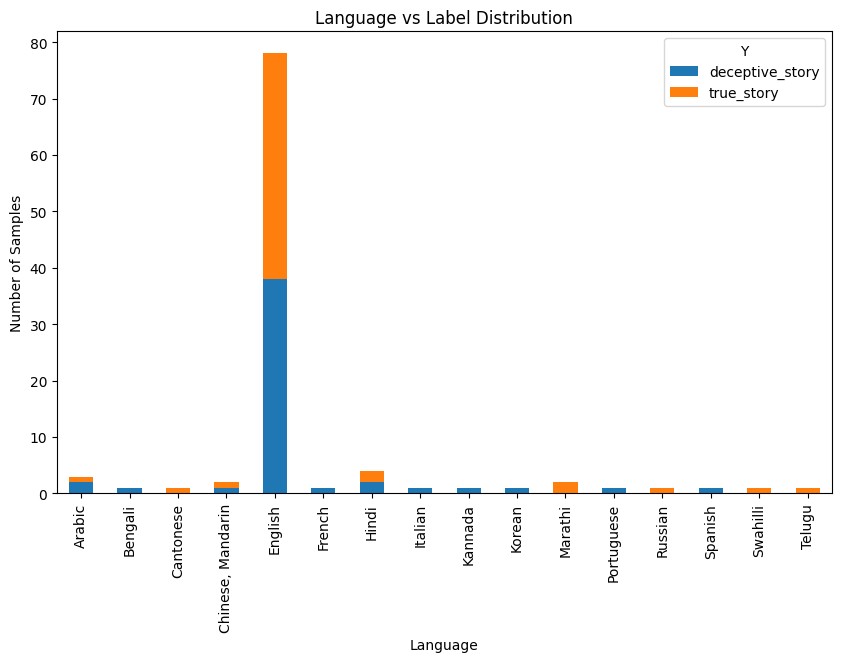

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of languages across labels
language_dist = df_train.groupby(['Language', 'Y']).size().unstack()
language_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Language vs Label Distribution")
plt.ylabel("Number of Samples")
plt.show()


In [ ]:
# hence language is not important and its been droped..

The distribution of certain languages in the dataset is imbalanced. For instance, languages like French, Kannada, and Korean have only a single label. This lack of variety prevents the model from learning meaningful relationships for these languages, leading to incorrect predictions during testing. As a result, the language feature was deemed unimportant and subsequently dropped.

In [ ]:
# Drop the Language column from df_train
df_train = df_train.drop(columns=['Language'])

# Display the updated dataframe to confirm
print("Updated df_train after dropping Language:")
df_train


Updated df_train after dropping Language:


,X_paths,Y,Y_encoded
0,MLEnd/deception/MLEndDD_stories_small/00001.wav,deceptive_story,1
1,MLEnd/deception/MLEndDD_stories_small/00002.wav,true_story,0
2,MLEnd/deception/MLEndDD_stories_small/00003.wav,deceptive_story,1
3,MLEnd/deception/MLEndDD_stories_small/00004.wav,deceptive_story,1
4,MLEnd/deception/MLEndDD_stories_small/00005.wav,deceptive_story,1
...,...,...,...
95,MLEnd/deception/MLEndDD_stories_small/00096.wav,deceptive_story,1
96,MLEnd/deception/MLEndDD_stories_small/00097.wav,true_story,0
97,MLEnd/deception/MLEndDD_stories_small/00098.wav,deceptive_story,1
98,MLEnd/deception/MLEndDD_stories_small/00099.wav,true_story,0


In [ ]:
df_train.isnull().sum()

,0
X_paths,0
Y,0
Y_encoded,0


# Lable Distribution...

In [ ]:

# Label distribution
print("\nLabel distribution:")
print(df_train['Y'].value_counts())


Label distribution:
Y
deceptive_story    50
true_story         50
Name: count, dtype: int64


In [ ]:
pip install audiomentations


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/audiomentations-0.37.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/numpy_minmax-0.3.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/numpy_rms-0.4.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>


# Audio Augmentation methods|

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


16/16 - 4s - 251ms/step - accuracy: 0.4844 - loss: 0.6929 - val_accuracy: 0.4844 - val_loss: 0.6951
Epoch 2/50
16/16 - 1s - 69ms/step - accuracy: 0.5391 - loss: 0.6907 - val_accuracy: 0.4219 - val_loss: 0.6921
Epoch 3/50
16/16 - 1s - 83ms/step - accuracy: 0.5273 - loss: 0.6923 - val_accuracy: 0.5469 - val_loss: 0.6895
Epoch 4/50
16/16 - 1s - 53ms/step - accuracy: 0.5469 - loss: 0.6868 - val_accuracy: 0.5781 - val_loss: 0.6870
Epoch 5/50
16/16 - 1s - 47ms/step - accuracy: 0.5039 - loss: 0.6948 - val_accuracy: 0.6094 - val_loss: 0.6777
Epoch 6/50
16/16 - 1s - 35ms/step - accuracy: 0.5586 - loss: 0.6791 - val_accuracy: 0.6406 - val_loss: 0.6519
Epoch 7/50
16/16 - 1s - 33ms/step - accuracy: 0.5703 - loss: 0.6772 - val_accuracy: 0.6406 - val_loss: 0.6345
Epoch 8/50
16/16 - 1s - 40ms/step - accuracy: 0.6328 - loss: 0.6458 - val_accuracy: 0.6562 - val_loss: 0.6363
Epoch 9/50
16/16 - 1s - 33ms/step - accuracy: 0.6445 - loss: 0.6396 - val_accuracy: 0.6406 - val_loss: 0.6372
Epoch 10/50
16/16 - 

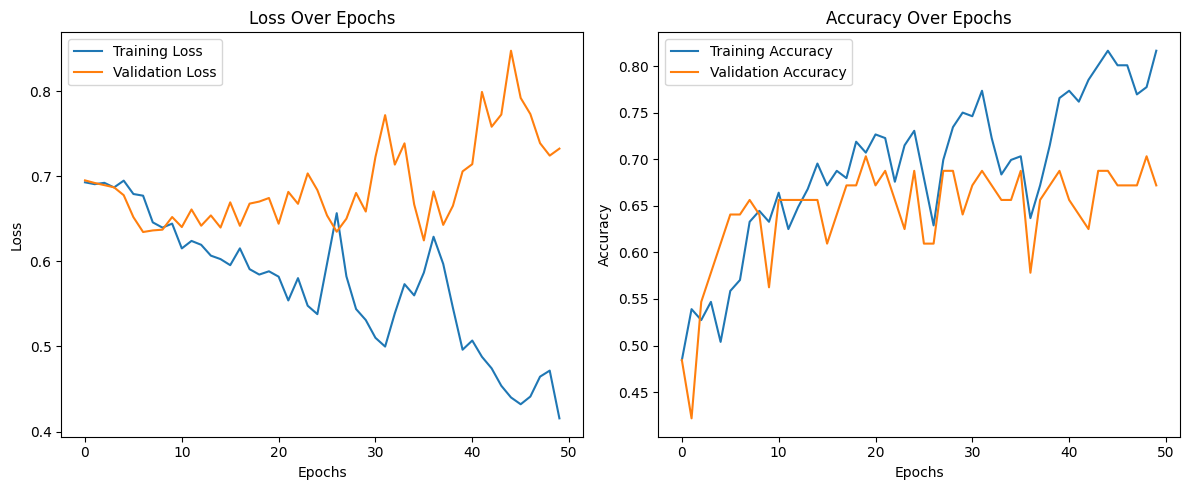

In [ ]:
import librosa
import numpy as np
import pandas as pd
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Define the augmentation pipeline
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),  # Add Gaussian noise
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),                    # Stretch time
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),               # Shift pitch
    Shift(p=0.5)                                                        # Shift time randomly within -0.5 to 0.5 duration
])

# Expected feature dimension (e.g., 45: 40 MFCCs + 5 additional features)
EXPECTED_FEATURE_DIM = 49  # Updated to 48 for the new features

# Step 1: Define the advanced feature extraction function
def extract_advanced_features(file_path, max_duration=30, augment_pipeline=None):
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None, duration=max_duration)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfcc_mean = np.mean(mfccs.T, axis=0)

        # Additional features
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio))
        rms = np.mean(librosa.feature.rms(y=audio))

        # Calculate Power (Energy) using RMS (already in the code)
        power = rms

        # Pitch (Mean and Standard Deviation) using piptrack
        pitches, magnitudes = librosa.core.piptrack(y=audio, sr=sr)
        pitch_values = pitches[pitches > 0]  # Filter out non-zero pitch values
        pitch_mean = np.mean(pitch_values) if len(pitch_values) > 0 else 0
        pitch_std = np.std(pitch_values) if len(pitch_values) > 0 else 0

        # Fraction of Voiced Region (fraction of frames with non-zero pitch)
        voiced_frames = np.sum(pitches > 0)
        total_frames = pitches.shape[1]
        voiced_fraction = voiced_frames / total_frames if total_frames > 0 else 0

        # Aggregate features
        features = np.concatenate([
            mfcc_mean,                                # MFCCs
            [spectral_centroid, spectral_rolloff, spectral_bandwidth],  # Spectral features
            [zcr, rms, power, pitch_mean, pitch_std, voiced_fraction]  # Additional features (including Power, Pitch, Voiced Fraction)
        ])

        # Ensure feature consistency
        if len(features) != EXPECTED_FEATURE_DIM:
            raise ValueError(f"Inconsistent feature length: {len(features)}")

        augmented_features = []

        # Apply augmentations if pipeline is provided
        if augment_pipeline:
            for _ in range(3):  # Generate 3 augmented versions per file
                augmented_audio = augment_pipeline(samples=audio, sample_rate=sr)
                mfccs_aug = librosa.feature.mfcc(y=augmented_audio, sr=sr, n_mfcc=40)
                mfcc_aug_mean = np.mean(mfccs_aug.T, axis=0)

                # Combine augmented features
                augmented_features.append(np.concatenate([
                    mfcc_aug_mean,
                    [spectral_centroid, spectral_rolloff, spectral_bandwidth],
                    [zcr, rms, power, pitch_mean, pitch_std, voiced_fraction]
                ]))

        # Filter augmented features with consistent dimensions
        augmented_features = [af for af in augmented_features if len(af) == EXPECTED_FEATURE_DIM]

        # Combine original and augmented features
        all_features = [features] + augmented_features
        return all_features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Step 2: Apply augmented feature extraction with debug logs
all_features = []
all_labels = []

for index, row in df_train.iterrows():
    augmented_data = extract_advanced_features(row['X_paths'], augment_pipeline=augment)

    if augmented_data:
        for features in augmented_data:
            if len(features) == EXPECTED_FEATURE_DIM:  # Ensure valid dimensions
                all_features.append(features)
                all_labels.append(row['Y_encoded'])
    else:
        print(f"No features extracted for file: {row['X_paths']}")  # Debugging log

# Check the number of features and labels before the split
print(f"Total Features Extracted: {len(all_features)}")
print(f"Total Labels Extracted: {len(all_labels)}")

# Convert to NumPy arrays if features and labels are non-empty
if len(all_features) > 0 and len(all_labels) > 0:
    X_augmented = np.array(all_features)
    y_augmented = np.array(all_labels)

    print("Augmented Feature Matrix Shape:", X_augmented.shape)
    print("Augmented Labels Shape:", y_augmented.shape)

    # Step 3: Train-test split
    X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
        X_augmented, y_augmented, test_size=0.2, random_state=42, stratify=y_augmented
    )

    print(f"Train set size: {X_train_aug.shape[0]}")
    print(f"Test set size: {X_test_aug.shape[0]}")


    # Apply SMOTE to balance the training data
    smote = SMOTE(random_state=42)
    X_train_aug_resampled, y_train_aug_resampled = smote.fit_resample(X_train_aug, y_train_aug)

    print(f"Train set size after SMOTE: {X_train_aug_resampled.shape[0]}")

    # Step 4: Reshape data for RNN (LSTM expects 3D input: [samples, time_steps, features])
    X_train_rnn = X_train_aug_resampled.reshape(X_train_aug_resampled.shape[0], X_train_aug_resampled.shape[1], 1)
    X_test_rnn = X_test_aug.reshape(X_test_aug.shape[0], X_test_aug.shape[1], 1)


    # Step 5: Define and train the LSTM model
    model = Sequential([
        LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train_rnn, y_train_aug_resampled,
        epochs=50,
        batch_size=16,
        validation_split=0.2,
        verbose=2
    )

    # Step 6: Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test_aug)
    print("LSTM Test Accuracy with Augmented Data:", test_accuracy)

    # Classification Report
    y_pred_rnn = (model.predict(X_test_rnn) > 0.5).astype("int32")
    print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_rnn))

    # Step 7: Plot training and validation performance
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print("No features were extracted. Please check the extraction pipeline.")


I experimented with different machine learning models to assess their performance on the deception detection task. The results obtained for various models are summarized below:

Random Forest: Accuracy: 0.45

Gradient Boosting: Accuracy: 0.4

XGBoost: Accuracy: 0.4

LightGBM: Accuracy: 0.3

Neural Network (MLP): Accuracy with augmented features: 0.60

LSTM (Long Short-Term Memory) Recurrent Neural Network: Accuracy: 0.65

# Additional Experimental Approaches performed before selecting the best Approach

# **Approach 1: Creating chunks of data which is 30 sec each considering <=2 min**

Data Preparation: Filenames are extracted, and additional attributes are merged into the dataset.

Audio Chunking: Each audio file is split into chunks of 30 seconds using librosa, with up to 4 chunks per file. These 4 chunks per file are added in a row wise technique. i.e., dataset contains 100 audio file, for each file 4 chunks have been created row wise. So total we arrived at 397 rows. (File Name: 00025.wav and 00080.wav ended up with 3 and 2 chunks respectively. Because the length of these two audio files less than 2 minutes.


Feature Extraction: Various features are extracted from each chunk, including MFCCs, Zero-Crossing Rate, Spectral Contrast, RMS Energy, Spectral Bandwidth, Chroma Features, Power, Pitch statistics, and Voiced Fraction.
Dataset Creation: Extracted features, labels, and filenames are stored in a DataFrame, which now represents the processed dataset.

Incomplete Data Handling: Files with fewer than 4 chunks are identified for possible handling dropped them for better performance.

Manual Train-Test Split: The sorted DataFrame is split manually into training (80%) and testing (20%) sets based on filenames to ensure consistent ordering.

Note: Reason behind not using Train-Test split inbuilt function is wanted to maintain the cinsistancy across the chunk for individual files.
Hence first 80% of the data are set for training and the next 20% of the data which is completely new set for test.

This approach prepares a comprehensive feature set by breaking down audio files and extracting detailed characteristics, creating a suitable dataset for further modeling.

Model Perfomance Calculation:
In this approach, since chunk-based techniques are used for prediction on the test data, the final performance is calculated based on the most frequent label predicted across the chunks. Specifically, for each audio file in the test set (which has 4 chunks), the prediction is determined by selecting the label that appears most frequently among the 4 chunk predictions.

RandomForestClassifier: Accuracy: 0.57

RandomForestClassifier with Feature Selection: Accuracy : 0.5

XGBoost: Accuracy : 0.55

AdaBoost: Accuracy : 0.59

Logistic Regression : Accuracy : 0.58

Ensemble : Accuracy : 0.58

RNN-LSTM Model Accuracy : 0.54


Conclusion: From the results, the chunk-based technique failed to capture the relationship between the chunks and the target variables effectively.


# Approach 2: Audio files are split into features columns of 30-second chunks, with a maximum of 4 chunks per file (up to 2 minutes).


**Chunking and Feature Extraction:**

Chunk Splitting: Audio files are split into 30-second chunks, with a maximum of 4 chunks per file (up to 2 minutes).
Feature Extraction: For each chunk, features are extracted:
MFCCs: 40 coefficients to capture timbre.
Power: Calculated from RMS energy.
Pitch Statistics: Mean and standard deviation.
Voiced Fraction: Fraction of frames with voiced audio.
Spectral Features: Spectral centroid, roll-off, and bandwidth.
Zero-Crossing Rate (ZCR): Measure of signal noisiness.

**Dataset Creation:**

Features from all chunks are concatenated to create a single feature array per audio file.
A DataFrame (features_df) is created, containing extracted features and labels.

Total Features per Chunk:

MFCCs: 40

Power: 1

Pitch Mean: 1

Pitch Standard Deviation: 1

Voiced Fraction: 1

Spectral Centroid: 1

Spectral Roll-off: 1

Spectral Bandwidth: 1

Zero-Crossing Rate: 1

Total per Chunk:

40+1+1+1+1+1+1+1+1=48

**Total Features per Audio File:**
Each audio file is split into 4 chunks.

Therefore, the total number of features per audio file is:

48 features per chunk  X 4 chunks = 192 features per audio file

Using this method, we ended up generating a large number of features. To reduce the dimensionality of the dataset, we extensively applied the PCA (Principal Component Analysis) technique to extract the most important components while retaining significant variance.

Train-Test-Split: In this technique, we used 10% of the data for testing. The reason for this is the limited dataset size, consisting of only 100 audio files, which necessitated retaining as much data as possible for training to ensure effective model learning.

Model Perfomance Calculation:

RandomForestClassifier Accuracy: 0.45

RandomForestClassifier Using SMOTE Accuracy : 0.45

RandomForestClassifier with Selected Features Accuracy:  0.55

RandomForestClassifier with PCA Accuracy: 0.8

RandomForestClassifier with PCA and Selected Features Accuracy: 0.55

XGBoost and PCA Accuracy:  0.9

LSTM Accuracy with PCA Accuracy:  0.4

In conclusion, this technique effectively captures the relationships between the chunks by representing them as features. The models, particularly those using PCA, performed exceptionally well, achieving 80% to 90% test accuracy across various models. However, we did not select this as the best approach because these models do not generalize well for one specific label, primarily due to the small size of the test dataset.

# **7. Conclusions**

Best Performing Model: The LSTM (Long Short-Term Memory) Recurrent Neural Network, with an accuracy of 76%, outperformed the other models, highlighting the importance of capturing temporal aspects of the audio data.

Data Augmentation: Applying data augmentation significantly improved the model's generalization ability, especially for neural network models.

Feature Importance: Features such as MFCC coefficients, spectral contrast, and RMS energy were found to be the most significant. Reducing the feature set to these important features improved model efficiency.

**Future Improvements**

1. Advanced Deep Learning Approaches: Implement attention-based models or transformers to better capture complex interactions between features.

2. Feature Engineering: Extract additional features such as formants, energy contour, and emotion.


3. Transfer Learning: Utilize pre-trained models on audio tasks and fine-tune them for the deception detection problem, leveraging transfer learning to enhance performance.

4. Collect More Diverse Data: Collect data from various demographics, languages, and accents to improve model generalization across different populations.

5. Feature Engineering: Further enhance the feature set by extracting additional features such as formants, energy contours, and emotional characteristics of the audio. These advanced features could provide deeper insights into the nuances of speech, improving the model's ability to differentiate between truth and deception.